In [1]:
#libraries for exploratory data analysis
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

#Reading the dataset
df=pd.read_csv('brain_stroke.csv')

In [ ]:
df

In [2]:
#Reading the features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [3]:
#we are checking for null value in the datasets since there are no null values we continue
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
#To find the range of values in dataset we obtain the Statistical variation of the dataset
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Text(0.5, 1.0, 'stroke-data')

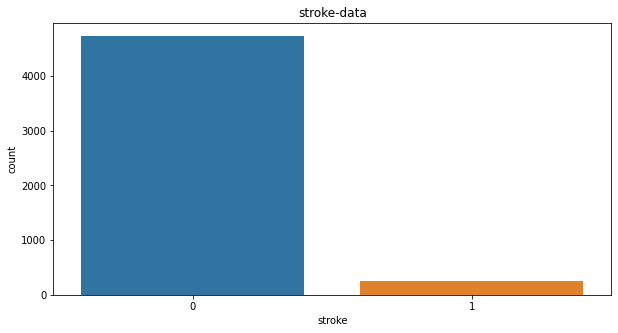

In [5]:
#Visualizing no of people having stroke
plt.figure(figsize=(10,5))
sn.countplot(data=df,x='stroke')
plt.title('stroke-data')

In [6]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [ ]:
#out of 4981 entries 248 people have stroke

In [7]:
#Approximate stroke ratio
no_of_people_with_stroke=df['stroke'].value_counts()[1]
no_of_people=df.shape[0]
print("ratio(among 20 people):",round(no_of_people_with_stroke*20/no_of_people))

ratio(among 20 people): 1


In [9]:
#Gender value distribution
df['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [10]:
#Analyzing the realtion between gender and stroke
df[['stroke','gender']].value_counts()

stroke  gender
0       Female    2767
        Male      1966
1       Female     140
        Male       108
dtype: int64

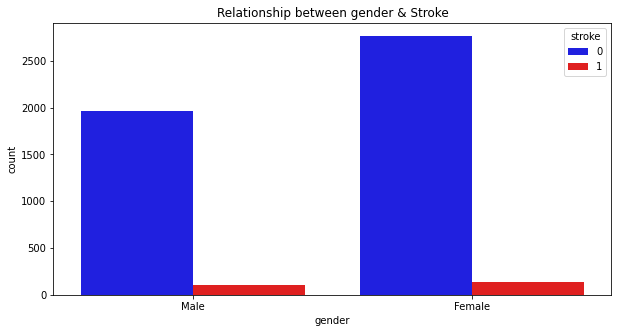

In [11]:
#Visualizing the realtion between gender and stroke
plt.figure(figsize=(10,5))
colors = ["blue", "red"]
sn.countplot(data=df, x='gender', hue='stroke', palette = colors)
plt.title("Relationship between gender & Stroke")
plt.show()

In [12]:
#Approximate ratio among females
total_females=df['gender'].value_counts()[0]
no_of_strokes_females=df[(df['stroke']==1)]['gender'].value_counts()[0]

print("ratio(among 1000 females):",round(no_of_strokes_females*1000/total_females))

ratio(among 1000 females): 48


In [13]:
#Approximate ratio among males
total_males=df['gender'].value_counts()[1]
no_of_strokes_males=df[(df['stroke']==1)]['gender'].value_counts()[1]

print("ratio(among 1000 males):",round(no_of_strokes_males*1000/total_males))

ratio(among 1000 males): 52


In [67]:
#approximate ratio of stroke in males and females among the net population

print("ratio of females having stroke(among 1000 people):",round(no_of_strokes_females*1000/no_of_people))
print("ratio of males having stroke(among 1000 people):",round(no_of_strokes_males*1000/no_of_people))


ratio of females having stroke(among 1000 people): 28
ratio of males having stroke(among 1000 people): 22


In [15]:
#labelling the data of age,bmi and avg_glucose_level and assigning it to a new dataset
df1=df

df1['bmi_label'] = pd.cut(df1['bmi'],
                   bins=[0,18.4,24.9,29.9,39.9,49.9],
                   labels = ['underweight','healthy','overweight','obese','extreme obese'])

df1['glucose_label'] = pd.cut(df1['avg_glucose_level'],
                       bins=[0,99,139,199,249,299],
                       labels = ['low','normal','prediabetes','diabetes','concerning level'])

df1['age_level'] = pd.cut(df1['age'],
                          bins=[0,12,24,40,60,80,100],
                          labels = ['child','teen','adult','elder','senior citizen','super senior citizen'])

In [17]:
#analyzing relation between heart_disease and stroke
df1[df['stroke']==1][['heart_disease','stroke']].value_counts()

heart_disease  stroke
0              1         201
1              1          47
dtype: int64

In [ ]:
# 201 people do not have heart disease but have stroke
# 47 people have stroke and heart disease
# Hence heart disease doesn't actually say you should have stroke

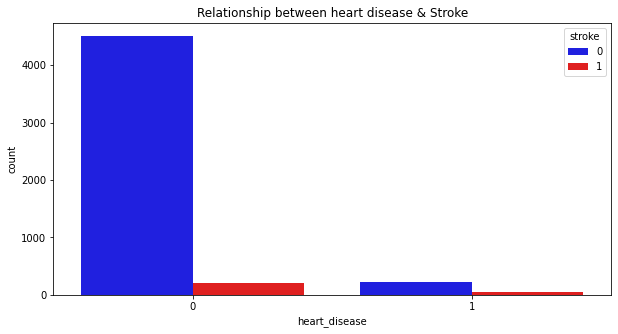

In [18]:
#visualizing relation between heart_disease and stroke
plt.figure(figsize=(10,5))
colors = ["blue", "red"]
sn.countplot(data=df, x='heart_disease', hue='stroke', palette = colors)
plt.title("Relationship between heart disease & Stroke")
plt.show()

In [19]:
#analyzing relation between smoking_status and stroke
df1[['smoking_status','stroke']].value_counts()

smoking_status   stroke
never smoked     0         1749
Unknown          0         1453
formerly smoked  0          797
smokes           0          734
never smoked     1           89
formerly smoked  1           70
Unknown          1           47
smokes           1           42
dtype: int64

In [ ]:
#89 people who have never smoked have stroke
#only 42 people who smoke have stroke
#Therefore Smoking doesnt determine stroke

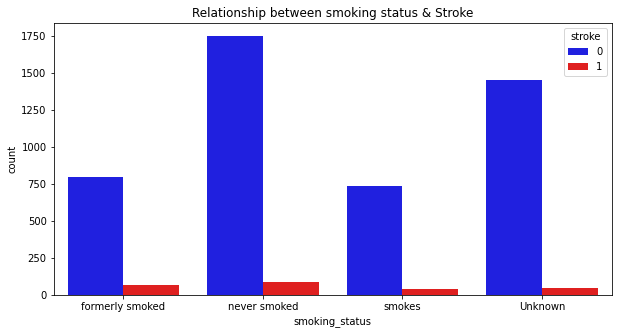

In [20]:
#visualizing relation between somking status and stroke
plt.figure(figsize=(10,5))
colors = ["blue", "red"]
sn.countplot(data=df, x='smoking_status', hue='stroke', palette = colors)
plt.title("Relationship between smoking status & Stroke")
plt.show()

In [21]:
#analyzing relation between hypertension and stroke
df1[['hypertension','stroke']].value_counts()

hypertension  stroke
0             0         4320
1             0          413
0             1          182
1             1           66
dtype: int64

In [ ]:
#182 people do not have hypertension but have stroke
#only 66 people have hypertension and stroke
# Therefore if a person has hypertension he need not have stroke

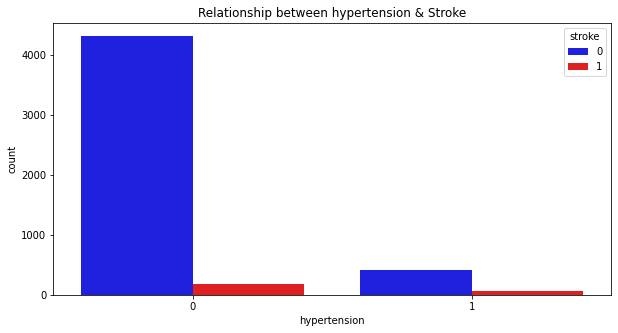

In [22]:
#visualizing relation between hypertension and stroke
plt.figure(figsize=(10,5))
colors = ["blue", "red"]
sn.countplot(data=df, x='hypertension', hue='stroke', palette = colors)
plt.title("Relationship between hypertension & Stroke")
plt.show()

In [23]:
#analyzing relation between age and stroke
df1[df['stroke']==1][['age_level','stroke']].value_counts()

age_level             stroke
senior citizen        1         154
elder                 1          63
super senior citizen  1          23
adult                 1           6
child                 1           1
teen                  1           1
dtype: int64

In [ ]:
#Senior citizens are more prone to stroke than teens or children

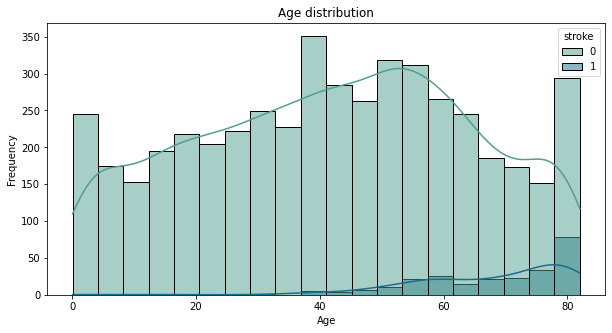

In [24]:
#visualyzing relation between age and stroke
plt.figure(figsize=(10,5))
sn.histplot(data=df,x='age',kde=True,hue='stroke',palette='crest')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

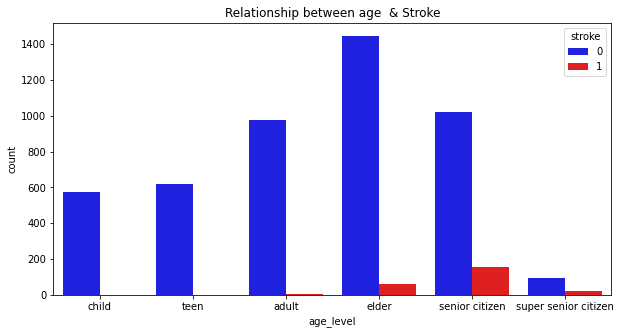

In [25]:
#visualyzing relation between age and stroke

plt.figure(figsize=(10,5))
colors = ["blue", "red"]
sn.countplot(data=df, x='age_level', hue='stroke', palette = colors)
plt.title("Relationship between age  & Stroke")
plt.show()

In [26]:
#visualyzing relation between bmi and stroke
df1[['stroke','bmi_label']].value_counts()

stroke  bmi_label    
0       obese            1509
        overweight       1391
        healthy          1210
        underweight       319
        extreme obese     304
1       overweight         99
        obese              94
        healthy            36
        extreme obese      18
        underweight         1
dtype: int64

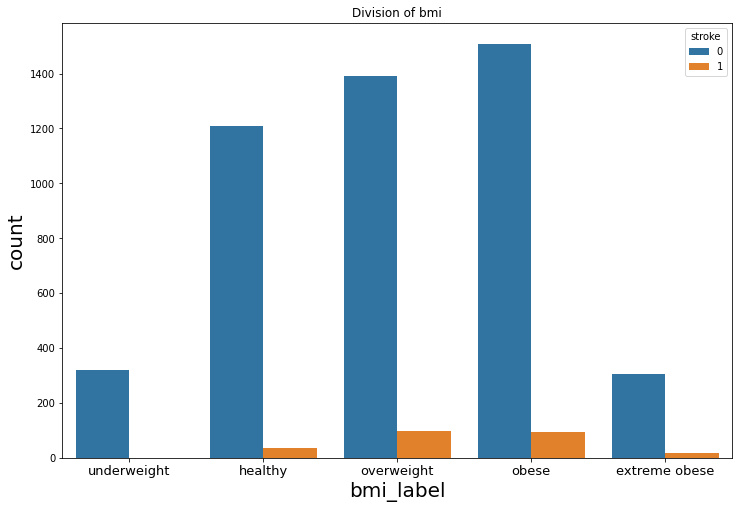

In [27]:
#visualyzing relation between bmi and stroke

plt.figure(figsize=(12,8))
sn.countplot(x='bmi_label', data=df1, hue='stroke')
plt.title('Division of bmi')
plt.xlabel('bmi_label', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xticks(fontsize=13)
plt.show()

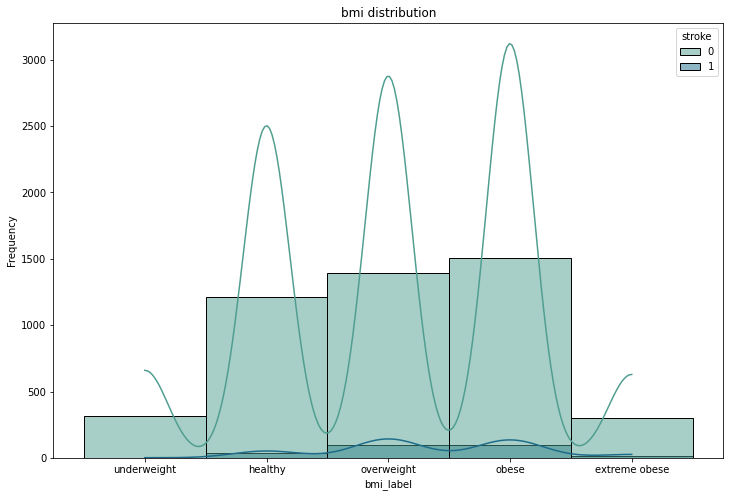

In [28]:
#visualyzing relation between bmi and stroke

plt.figure(figsize=(12,8))
sn.histplot(data=df,x='bmi_label',kde=True,hue='stroke',palette='crest')
plt.title('bmi distribution')
plt.xlabel('bmi_label')
plt.ylabel('Frequency')
plt.show()

In [29]:
#analyzing relation between glucose_level and stroke
df1[['stroke','glucose_label']].value_counts()

stroke  glucose_label   
0       low                 2891
        normal              1134
        diabetes             347
        prediabetes          340
1       low                  111
        diabetes              52
        normal                45
        prediabetes           34
0       concerning level      21
1       concerning level       6
dtype: int64

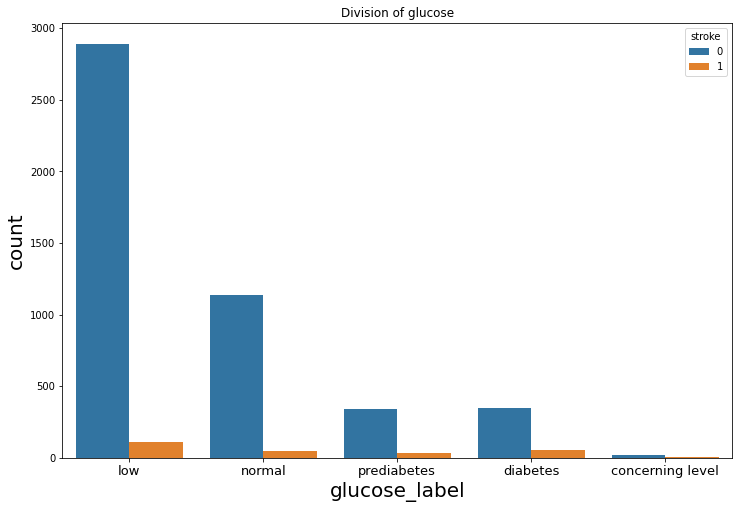

In [30]:
#visualyzing relation between glucose_level and stroke

plt.figure(figsize=(12,8))
sn.countplot(x='glucose_label', data=df1, hue='stroke')
plt.title('Division of glucose')
plt.xlabel('glucose_label', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xticks(fontsize=13)
plt.show()


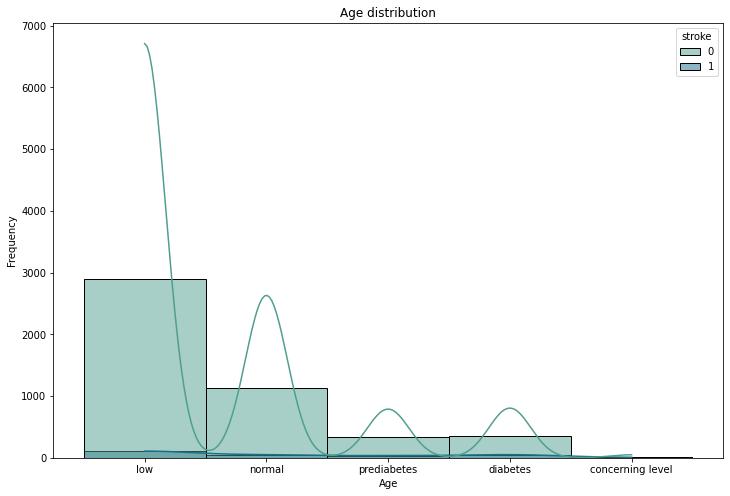

In [31]:
#visualyzing relation between glucose_level and stroke

plt.figure(figsize=(12,8))
sn.histplot(data=df,x='glucose_label',kde=True,hue='stroke',palette='crest')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [32]:
#analyzing relation between glucose_level and stroke
df1[['work_type','stroke']].value_counts()


work_type      stroke
Private        0         2712
Self-employed  0          739
children       0          671
Govt_job       0          611
Private        1          148
Self-employed  1           65
Govt_job       1           33
children       1            2
dtype: int64

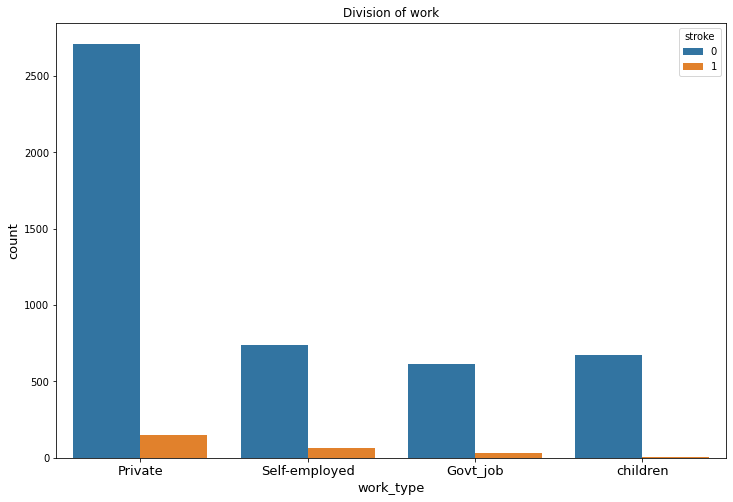

In [33]:
#visualyzing relation between work_type and stroke

plt.figure(figsize=(12,8))
sn.countplot(x='work_type', data=df1, hue='stroke')
plt.title('Division of work')
plt.xlabel('work_type', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize=13)
plt.show()

In [34]:
#analyzing between ever_married and stroke
df1[['ever_married','stroke']].value_counts()

ever_married  stroke
Yes           0         3061
No            0         1672
Yes           1          219
No            1           29
dtype: int64

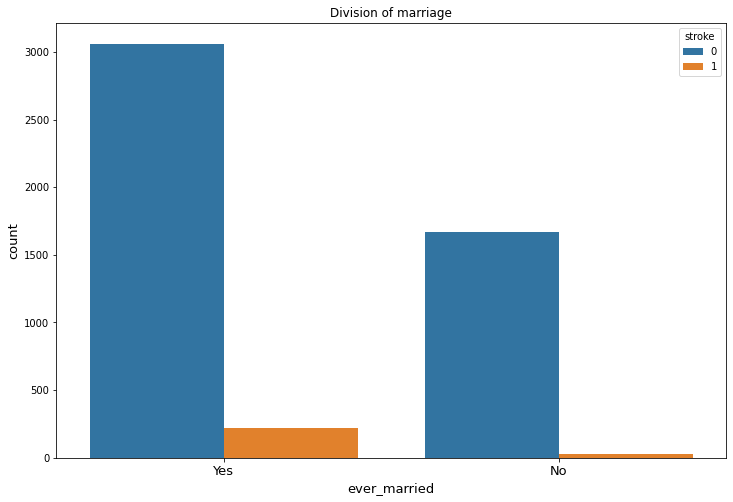

In [35]:
#visualyzing relation between ever_married and stroke


plt.figure(figsize=(12,8))
sn.countplot(x='ever_married', data=df1, hue='stroke')
plt.title('Division of marriage')
plt.xlabel('ever_married', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize=13)
plt.show()



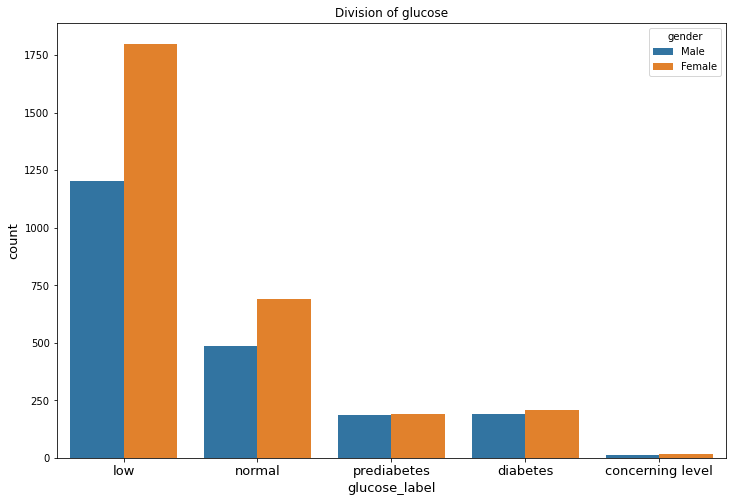

In [36]:
#visualyzing relation between glucose_label,gender
plt.figure(figsize=(12,8))
sn.countplot(x='glucose_label', data=df1, hue='gender')
plt.title('Division of glucose')
plt.xlabel('glucose_label', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize=13)
plt.show()

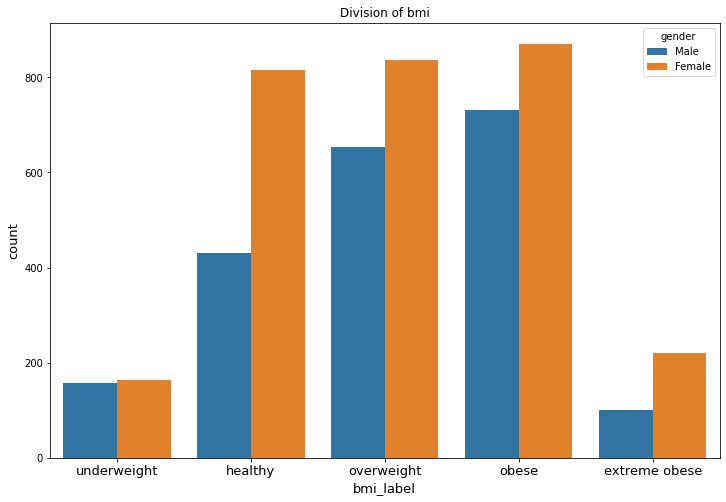

In [37]:
#visualyzing relation between bmi_label,gender 
plt.figure(figsize=(12,8))
sn.countplot(x='bmi_label', data=df1, hue='gender')
plt.title('Division of bmi')
plt.xlabel('bmi_label', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize=13)
plt.show()

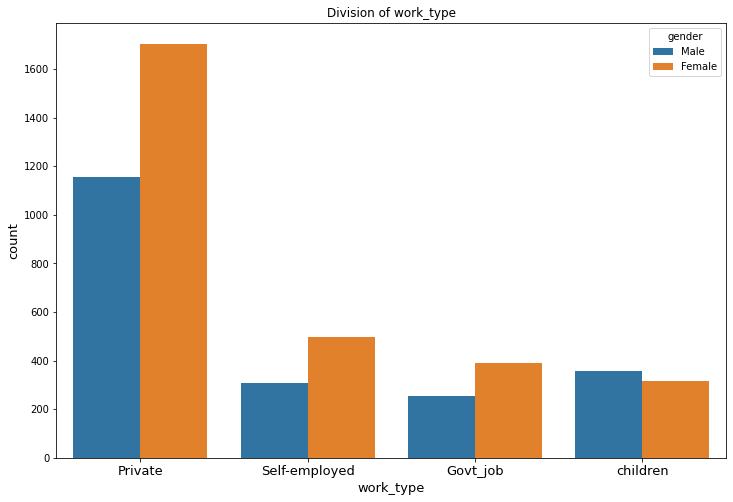

In [38]:
#visualyzing relation between work_type,gender 
plt.figure(figsize=(12,8))
sn.countplot(x='work_type', data=df1, hue='gender')
plt.title('Division of work_type')
plt.xlabel('work_type', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize=13)
plt.show()

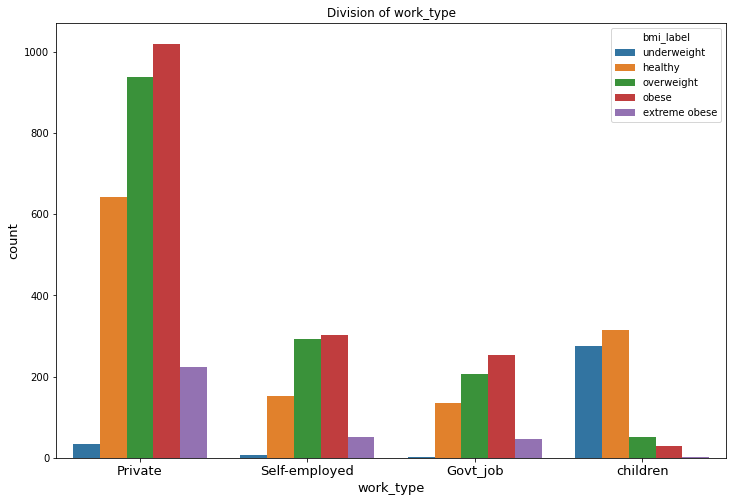

In [39]:
#visualyzing relation between work_type,bmi_label
plt.figure(figsize=(12,8))
sn.countplot(x='work_type', data=df1, hue='bmi_label')
plt.title('Division of work_type')
plt.xlabel('work_type', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize=13)
plt.show()

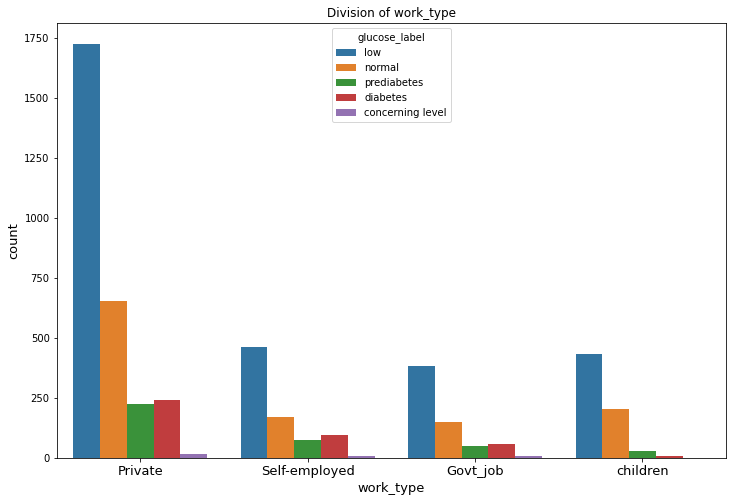

In [40]:
#visualyzing relation between work_type,bmi_label
plt.figure(figsize=(12,8))
sn.countplot(x='work_type', data=df1, hue='glucose_label')
plt.title('Division of work_type')
plt.xlabel('work_type', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.xticks(fontsize=13)
plt.show()

In [41]:
'''
Final analysis:-

1) Females are more likely to get a stroke than male.
2) People who are employed in the private sector are more likely to get a stroke.
3) There is no clear relation between heart diseases and hypertension with stroke.
4) Smoking is not a conclusive evidence to determine stroke.
5) People who are obese,overweight are more likely to get a stroke.
6) People with low glucose level are likely to get a stroke.
7) Senior and super senior citizens are more likely to get a stroke.
8) Marriage doesn't determine stroke.

'''



"\nFinal analysis:-\n\n1) Females are more likely to get a stroke than male.\n2) People who are employed in the private sector are more likely to get a stroke.\n3) There is no clear relation between heart diseases and hypertension with stroke.\n4) Smoking is not a conclusive evidence to determine stroke.\n5) People who are obese,overweight are more likely to get a stroke.\n6) People with low glucose level are likely to get a stroke.\n7) Senior and super senior citizens are more likely to get a stroke.\n8) Marriage doesn't determine stroke.\n\n"

In [42]:
#Importing dataset 
stroke=pd.read_csv('brain_stroke.csv')
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [43]:
#Label Encoder

object_col = ["gender", "ever_married", "Residence_type"]
label_encoder=preprocessing.LabelEncoder()
for col in object_col:
     stroke[col]=label_encoder.fit_transform(stroke[col])
        p
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,Private,0,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,1,Private,1,191.15,31.1,smokes,0
4978,0,45.0,1,0,1,Govt_job,0,95.02,31.8,smokes,0
4979,1,40.0,0,0,1,Private,0,83.94,30.0,smokes,0


In [44]:
#Dummy Variables
stroke=pd.get_dummies(stroke)
#stroke

In [60]:
stroke.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5 non-null      int64  
 1   age                             5 non-null      float64
 2   hypertension                    5 non-null      int64  
 3   heart_disease                   5 non-null      int64  
 4   ever_married                    5 non-null      int64  
 5   Residence_type                  5 non-null      int64  
 6   avg_glucose_level               5 non-null      float64
 7   bmi                             5 non-null      float64
 8   stroke                          5 non-null      int64  
 9   work_type_Govt_job              5 non-null      uint8  
 10  work_type_Private               5 non-null      uint8  
 11  work_type_Self-employed         5 non-null      uint8  
 12  work_type_children              5 non-nu

In [45]:
y=stroke['stroke']
X=stroke.drop(['stroke'],axis=1)

In [46]:
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
lr=LogisticRegression()
lr.fit(X_train, Y_train)
y_predict=lr.predict(X_test)

#acc=lr.score(Y_test,y_predict)
#print("Accuracy is:", acc)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
lr.score(X_test,Y_test)




0.9458375125376128

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

acc = dt.score(X_test,Y_test)
print("Decision Tree accuracy score is :",acc)



Decision Tree accuracy score is : 0.9167502507522568


In [50]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)  
acc = classifier.score(X_test,Y_test)
print("SVM accuracy sore is:",acc)


SVM accuracy sore is: 0.9458375125376128


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
acc=rfc.score(X_test,Y_test)
print("Random forest classifier score is:",acc)


Random forest classifier score is: 0.9418254764292878
